In [1132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA

In [1133]:
df = pd.read_csv('nasa_kepler.csv')

In [1134]:
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [1135]:
# Information about the dataset
# This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu
# Tue Jan  2 03:07:46 2024
#
# COLUMN kepid:          KepID
# COLUMN kepoi_name:     KOI Name
# COLUMN kepler_name:    Kepler Name
# COLUMN koi_disposition: Exoplanet Archive Disposition
# COLUMN koi_pdisposition: Disposition Using Kepler Data
# COLUMN koi_score:      Disposition Score
# COLUMN koi_fpflag_nt:  Not Transit-Like False Positive Flag
# COLUMN koi_fpflag_ss:  Stellar Eclipse False Positive Flag
# COLUMN koi_fpflag_co:  Centroid Offset False Positive Flag
# COLUMN koi_fpflag_ec:  Ephemeris Match Indicates Contamination False Positive Flag
# COLUMN koi_period:     Orbital Period [days]
# COLUMN koi_period_err1: Orbital Period Upper Unc. [days]
# COLUMN koi_period_err2: Orbital Period Lower Unc. [days]
# COLUMN koi_time0bk:    Transit Epoch [BKJD]
# COLUMN koi_time0bk_err1: Transit Epoch Upper Unc. [BKJD]
# COLUMN koi_time0bk_err2: Transit Epoch Lower Unc. [BKJD]
# COLUMN koi_impact:     Impact Parameter
# COLUMN koi_impact_err1: Impact Parameter Upper Unc.
# COLUMN koi_impact_err2: Impact Parameter Lower Unc.
# COLUMN koi_duration:   Transit Duration [hrs]
# COLUMN koi_duration_err1: Transit Duration Upper Unc. [hrs]
# COLUMN koi_duration_err2: Transit Duration Lower Unc. [hrs]
# COLUMN koi_depth:      Transit Depth [ppm]
# COLUMN koi_depth_err1: Transit Depth Upper Unc. [ppm]
# COLUMN koi_depth_err2: Transit Depth Lower Unc. [ppm]
# COLUMN koi_prad:       Planetary Radius [Earth radii]
# COLUMN koi_prad_err1:  Planetary Radius Upper Unc. [Earth radii]
# COLUMN koi_prad_err2:  Planetary Radius Lower Unc. [Earth radii]
# COLUMN koi_teq:        Equilibrium Temperature [K]
# COLUMN koi_teq_err1:   Equilibrium Temperature Upper Unc. [K]
# COLUMN koi_teq_err2:   Equilibrium Temperature Lower Unc. [K]
# COLUMN koi_insol:      Insolation Flux [Earth flux]
# COLUMN koi_insol_err1: Insolation Flux Upper Unc. [Earth flux]
# COLUMN koi_insol_err2: Insolation Flux Lower Unc. [Earth flux]
# COLUMN koi_model_snr:  Transit Signal-to-Noise
# COLUMN koi_tce_plnt_num: TCE Planet Number
# COLUMN koi_tce_delivname: TCE Delivery
# COLUMN koi_steff:      Stellar Effective Temperature [K]
# COLUMN koi_steff_err1: Stellar Effective Temperature Upper Unc. [K]
# COLUMN koi_steff_err2: Stellar Effective Temperature Lower Unc. [K]
# COLUMN koi_slogg:      Stellar Surface Gravity [log10(cm/s**2)]
# COLUMN koi_slogg_err1: Stellar Surface Gravity Upper Unc. [log10(cm/s**2)]
# COLUMN koi_slogg_err2: Stellar Surface Gravity Lower Unc. [log10(cm/s**2)]
# COLUMN koi_srad:       Stellar Radius [Solar radii]
# COLUMN koi_srad_err1:  Stellar Radius Upper Unc. [Solar radii]
# COLUMN koi_srad_err2:  Stellar Radius Lower Unc. [Solar radii]
# COLUMN ra:             RA [decimal degrees]
# COLUMN dec:            Dec [decimal degrees]
# COLUMN koi_kepmag:     Kepler-band [mag]
#

In [1136]:
df['koi_disposition'].value_counts()

koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2741
CANDIDATE         1984
Name: count, dtype: int64

In [1137]:
df['koi_pdisposition'].value_counts()

koi_pdisposition
FALSE POSITIVE    4847
CANDIDATE         4717
Name: count, dtype: int64

In [1138]:
# koi_tce_plnt_num represents the same information as in kepoi_name
# so we can drop it
df[['kepoi_name', 'koi_tce_plnt_num']].head(15)

,kepoi_name,koi_tce_plnt_num
0,K00752.01,1.0
1,K00752.02,2.0
2,K00753.01,1.0
3,K00754.01,1.0
4,K00755.01,1.0
5,K00756.01,1.0
6,K00756.02,2.0
7,K00756.03,3.0
8,K00114.01,1.0
9,K00757.01,1.0


In [1139]:
df.isnull().sum()

kepid                   0
kepoi_name              0
kepler_name          6821
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_er

In [1140]:
# drop columns with name labels
# drop koi_teq_err1 and koi_teq_err2 because they have 0 values in df

drop_col = ['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_teq_err1', 'koi_teq_err2', 'koi_tce_plnt_num']

In [1141]:
df.drop(drop_col, axis=1, inplace=True)

In [1142]:
df.head()

,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


<Axes: >

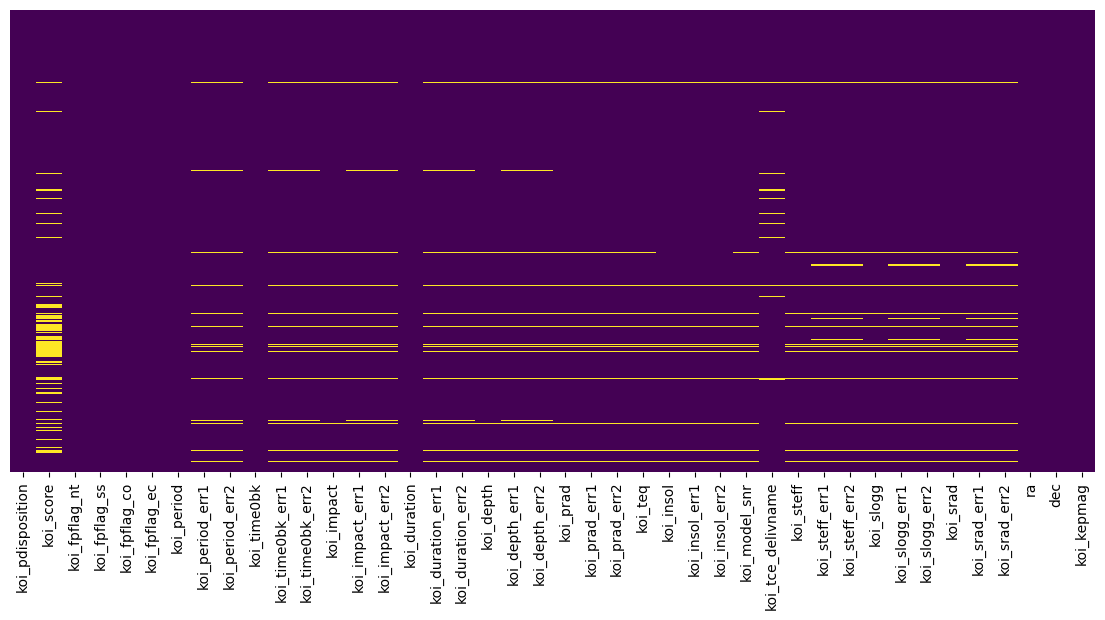

In [1143]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

In [1144]:
# many of the missing values occur in the same rows
# drop rows with missing values

<Axes: xlabel='koi_score', ylabel='Count'>

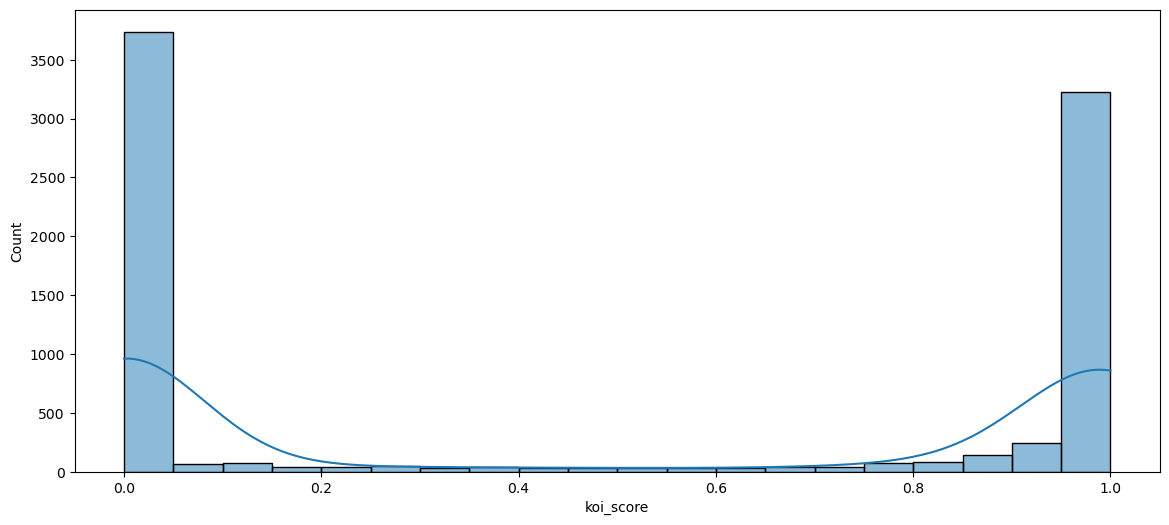

In [1145]:
# explore the koi_score

plt.figure(figsize=(14, 6))
sns.histplot(df['koi_score'], bins=20, kde=True)

<Axes: xlabel='koi_pdisposition', ylabel='koi_score'>

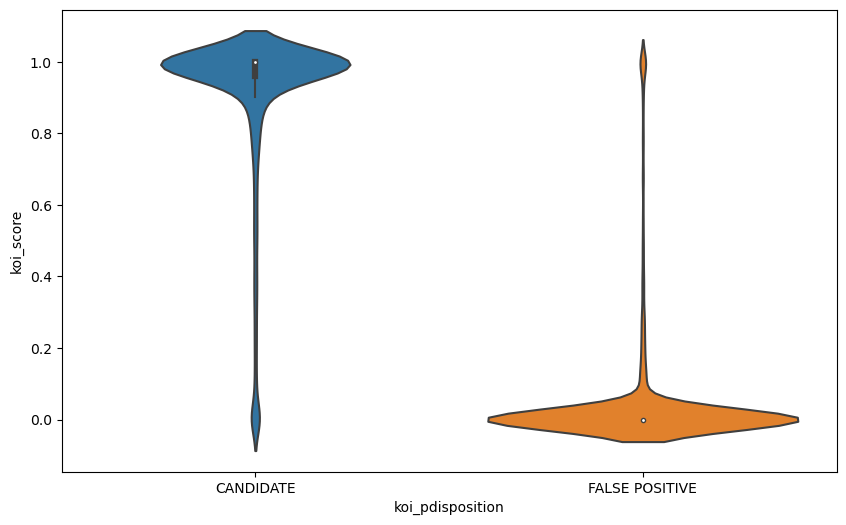

In [1146]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='koi_pdisposition', y='koi_score', data=df)

In [1147]:
df.groupby('koi_pdisposition')['koi_score'].describe()

,count,mean,std,min,25%,50%,75%,max
koi_pdisposition,,,,,,,,
CANDIDATE,4102.0,0.906390,0.228884,0.0,0.96025,0.998,1.0,1.0
FALSE POSITIVE,3952.0,0.039116,0.161416,0.0,0.00000,0.000,0.0,1.0


In [1148]:
# koi_score seems to be highly correlated with koi_pdisposition
# but there are candidate planets where the koi_score is close to 0
# and false positive where the koi_score is close to 1
# so we will keep koi_score as a feature in our model

In [1149]:
# From this EDA, to handle missing values, 
# we will drop rows with missing values

## Final Exoplanet DataFrame

In [1150]:
exoplanet_df = df.dropna()

In [1151]:
# we still have 81% of the original data
print('lenght of exoplanet_df: ', len(exoplanet_df))
print('% of full data: ', len(exoplanet_df)/len(df)*100) 

lenght of exoplanet_df:  7803
% of full data:  81.58720200752822


In [1152]:
exoplanet_df.isnull().sum()

koi_pdisposition     0
koi_score            0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_delivname    0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra                   0
dec                  0
koi_kepmag           0
dtype: int64

In [1153]:
# the column 'koi_tce_delivname' only contains one value
exoplanet_df['koi_tce_delivname'].value_counts()

koi_tce_delivname
q1_q17_dr25_tce    7803
Name: count, dtype: int64

In [1154]:
# we will drop this column
exoplanet_df.drop('koi_tce_delivname', axis=1, inplace=True)

/var/folders/_2/3t2c95cn5sjcvt63r1qfngh00000gn/T/ipykernel_53035/3389222656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exoplanet_df.drop('koi_tce_delivname', axis=1, inplace=True)


In [1155]:
exoplanet_df['koi_pdisposition'].value_counts()

koi_pdisposition
CANDIDATE         4062
FALSE POSITIVE    3741
Name: count, dtype: int64

In [1156]:
# convert koi_pdisposition to binary values
# Candidate = 1, False Positive = 0

def exo_candidate(x):
    if x == 'CANDIDATE':
        return 1
    else:
        return 0

In [1157]:
exoplanet_df['Exo_candidate'] = exoplanet_df['koi_pdisposition'].apply(lambda x: exo_candidate(x))
exoplanet_df.drop('koi_pdisposition', axis=1, inplace=True)

/var/folders/_2/3t2c95cn5sjcvt63r1qfngh00000gn/T/ipykernel_53035/996417396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exoplanet_df['Exo_candidate'] = exoplanet_df['koi_pdisposition'].apply(lambda x: exo_candidate(x))
/var/folders/_2/3t2c95cn5sjcvt63r1qfngh00000gn/T/ipykernel_53035/996417396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exoplanet_df.drop('koi_pdisposition', axis=1, inplace=True)


In [1158]:
exoplanet_df.head()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,Exo_candidate
0,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1
1,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1
2,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1
3,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0
4,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1


<Axes: xlabel='Exo_candidate', ylabel='count'>

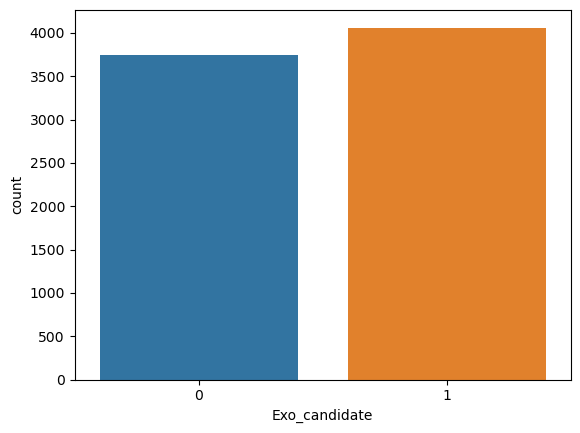

In [1159]:
# It is roughly a balanced dataset
sns.countplot(x='Exo_candidate', data=exoplanet_df)

<Axes: >

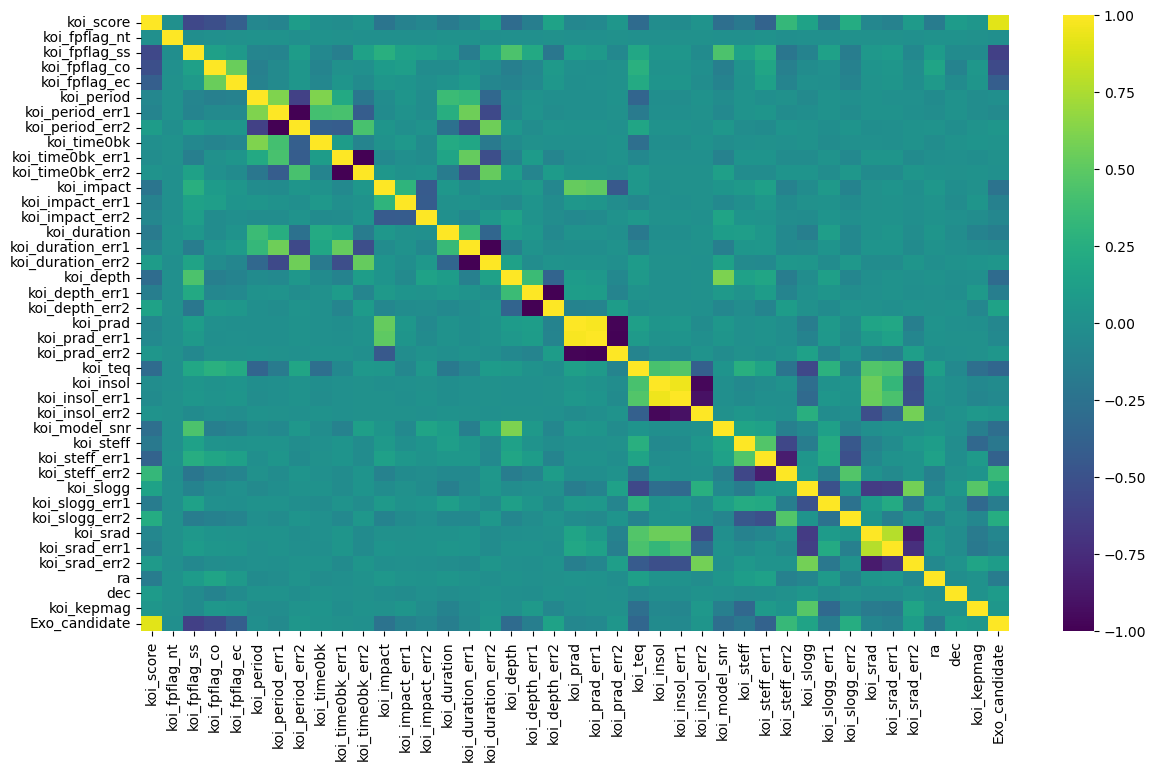

In [1160]:
plt.figure(figsize=(14, 8))
sns.heatmap(exoplanet_df.corr(), cmap='viridis')

<Axes: >

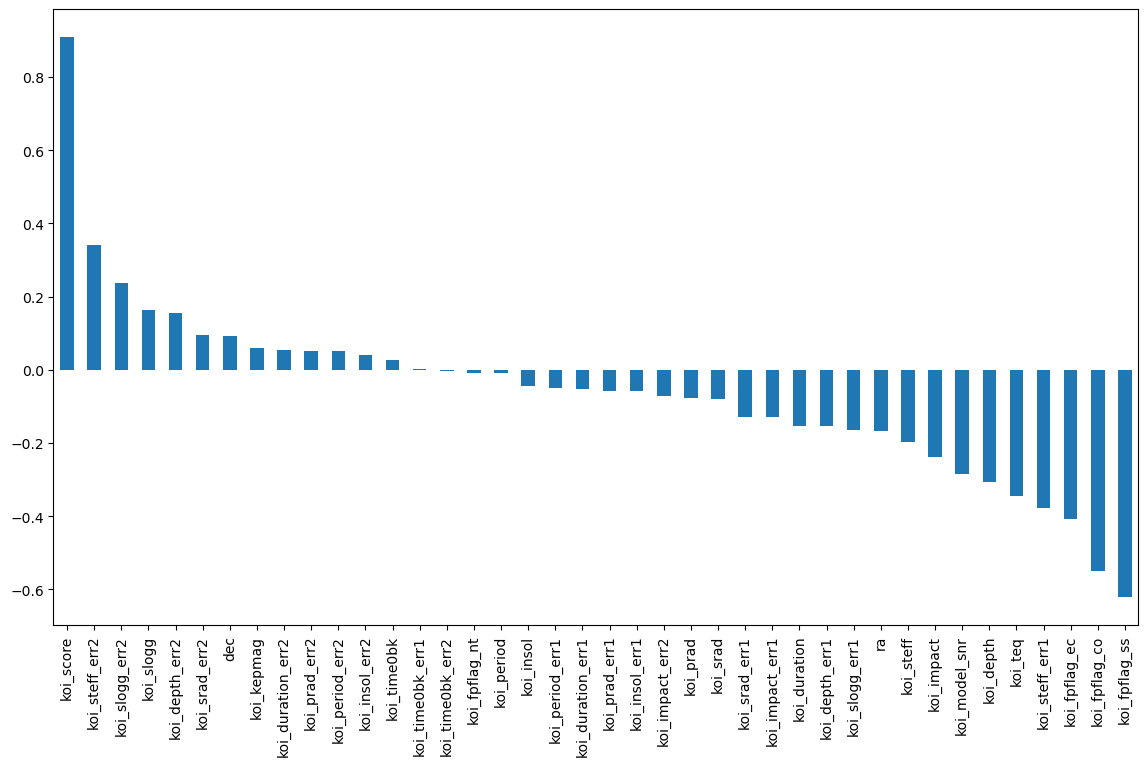

In [1161]:
plt.figure(figsize=(14, 8))
exoplanet_df.corr()['Exo_candidate'].sort_values(ascending=False)[1:].plot(kind='bar')

In [1162]:
exoplanet_df.describe().T

,count,mean,std,min,25%,50%,75%,max
koi_score,7803.0,0.491614,0.477082,0.000000e+00,0.000000,0.475000,0.999000,1.000000e+00
koi_fpflag_nt,7803.0,0.159041,5.271453,0.000000e+00,0.000000,0.000000,0.000000,4.650000e+02
koi_fpflag_ss,7803.0,0.265667,0.441716,0.000000e+00,0.000000,0.000000,1.000000,1.000000e+00
koi_fpflag_co,7803.0,0.217993,0.412909,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
koi_fpflag_ec,7803.0,0.133538,0.340177,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
koi_period,7803.0,37.314267,86.826061,2.598197e-01,2.455472,7.698431,24.089219,1.071233e+03
koi_period_err1,7803.0,0.000948,0.005017,1.100000e-08,0.000004,0.000025,0.000134,1.340000e-01
koi_period_err2,7803.0,-0.000948,0.005017,-1.340000e-01,-0.000134,-0.000025,-0.000004,-1.100000e-08
koi_time0bk,7803.0,157.877359,57.892061,1.205659e+02,132.633560,136.016200,159.775731,1.472522e+03
koi_time0bk_err1,7803.0,0.007563,0.020448,8.700000e-06,0.000998,0.003300,0.007810,5.690000e-01


In [1163]:
# categorical features
exoplanet_df[['koi_fpflag_ss', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec']]

,koi_fpflag_ss,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,1,0,0
4,0,0,0,0
...,...,...,...,...
9559,1,1,1,0
9560,0,0,0,0
9561,0,0,1,0
9562,0,0,0,0


In [1164]:
exoplanet_df.groupby('koi_fpflag_nt')['Exo_candidate'].sum()

koi_fpflag_nt
0      4060
1         1
465       1
Name: Exo_candidate, dtype: int64

In [1165]:
exoplanet_df.groupby('koi_fpflag_ss')['Exo_candidate'].sum()

koi_fpflag_ss
0    4052
1      10
Name: Exo_candidate, dtype: int64

In [1166]:
exoplanet_df.groupby('koi_fpflag_co')['Exo_candidate'].sum()

koi_fpflag_co
0    4062
1       0
Name: Exo_candidate, dtype: int64

In [1167]:
exoplanet_df.groupby('koi_fpflag_ec')['Exo_candidate'].sum()

koi_fpflag_ec
0    4062
1       0
Name: Exo_candidate, dtype: int64

In [1168]:
# This features denote properties of the object observed by Kepler
# that are not consistent with that of a transiting planet
# As we can see this features are highly correlated with the target
# and in almost 1 to 1 correspondence

In [1169]:
# It seems like these are inferred from the signal as observed by Kepler
# and is not a part of feature from the signal
# so we will drop them from our model

In [1170]:
exoplanet_df.drop(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec'], axis=1, inplace=True)

/var/folders/_2/3t2c95cn5sjcvt63r1qfngh00000gn/T/ipykernel_53035/1848075156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exoplanet_df.drop(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec'], axis=1, inplace=True)


## Data Preprocessing

In [1171]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [1172]:
train_val_df, test_df = train_test_split(exoplanet_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42)

In [1173]:
train_df

,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,Exo_candidate
2681,0.939,3.614603,0.000024,-0.000024,133.09123,0.005450,-0.005450,0.026,0.431,-0.026,...,4.161,0.188,-0.101,1.375,0.221,-0.295,292.18011,49.202480,13.219,1
5358,0.015,3.351574,0.000003,-0.000003,134.28062,0.001120,-0.001120,0.011,0.178,-0.011,...,4.408,0.090,-0.195,1.033,0.322,-0.161,295.52621,46.457142,17.279,0
1280,0.964,9.695011,0.000047,-0.000047,182.45413,0.004190,-0.004190,0.293,0.144,-0.293,...,4.516,0.052,-0.208,0.914,0.274,-0.091,295.78516,40.439548,15.809,1
8369,0.000,0.566801,0.000004,-0.000004,131.82499,0.004460,-0.004460,0.770,0.169,-0.516,...,4.454,0.054,-0.202,1.021,0.320,-0.107,291.30963,42.616520,15.420,0
2813,0.000,4.880781,0.000107,-0.000107,133.70500,0.019000,-0.019000,0.581,0.048,-0.470,...,4.738,0.045,-0.021,0.516,0.023,-0.032,296.25168,39.183990,14.203,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,0.951,11.898495,0.000142,-0.000142,133.34685,0.009790,-0.009790,0.836,0.046,-0.570,...,4.194,0.182,-0.098,1.307,0.209,-0.256,288.96124,42.265011,13.959,1
6163,0.523,69.089357,0.002371,-0.002371,135.44610,0.028000,-0.028000,0.051,0.416,-0.051,...,4.581,0.063,-0.036,0.698,0.062,-0.068,290.87305,37.362179,15.572,1
3746,0.000,0.536544,0.000002,-0.000002,132.03219,0.003700,-0.003700,0.267,0.188,-0.267,...,4.597,0.040,-0.060,0.728,0.086,-0.065,291.24924,45.921490,15.890,0
3433,0.990,51.079265,0.000065,-0.000065,185.18087,0.000981,-0.000981,0.017,0.267,-0.017,...,4.407,0.085,-0.114,1.022,0.143,-0.107,295.64871,48.495560,12.772,1


In [1174]:
print('\n',
      exoplanet_df['Exo_candidate'].sum()/len(exoplanet_df),
      '\n',
      train_df['Exo_candidate'].sum()/len(train_df), 
      '\n',
      val_df['Exo_candidate'].sum()/len(val_df), 
      '\n',
      test_df['Exo_candidate'].sum()/len(test_df)
      )


 0.5205690119184929 
 0.5199278990586822 
 0.5156124899919936 
 0.5265855221012171


In [1175]:
X_train = train_df.drop('Exo_candidate', axis=1)
y_train = train_df['Exo_candidate']
X_val = val_df.drop('Exo_candidate', axis=1)
y_val = val_df['Exo_candidate']
X_test = test_df.drop('Exo_candidate', axis=1)
y_test = test_df['Exo_candidate']

In [1176]:
scaler = MinMaxScaler()

In [1177]:
scaler.fit(X_train)

MinMaxScaler()

In [1178]:
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Model

In [1179]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [1180]:
X_train.shape

(4993, 36)

In [1181]:
nn_model = Sequential()

# Layer structure: 20 --> 10 --> 1

nn_model.add(Dense(35, activation='relu'))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(20, activation='relu'))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(10, activation='relu'))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(5, activation='relu'))
nn_model.add(Dropout(0.1))

nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [1182]:
from tensorflow.keras.callbacks import EarlyStopping

In [1183]:
early_stop = EarlyStopping(monitor='val_loss', 
                           verbose=1, 
                           patience=100
                           )

In [1184]:
# Training
nn_model.fit(X_train, 
             y_train, 
             epochs=500, 
             validation_data=(X_val, y_val), 
             callbacks=[early_stop],
             batch_size=256,
             )

Epoch 1/500


20/20 [==============================] - 1s 5ms/step - loss: 0.6536 - accuracy: 0.6283 - val_loss: 0.6021 - val_accuracy: 0.7582
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 0.6080 - accuracy: 0.7004 - val_loss: 0.5351 - val_accuracy: 0.9456
Epoch 3/500
20/20 [==============================] - 0s 2ms/step - loss: 0.5433 - accuracy: 0.7717 - val_loss: 0.4400 - val_accuracy: 0.9472
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 0.4638 - accuracy: 0.8077 - val_loss: 0.3438 - val_accuracy: 0.9472
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 0.3712 - accuracy: 0.8436 - val_loss: 0.2586 - val_accuracy: 0.9464
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: 0.3183 - accuracy: 0.8508 - val_loss: 0.2158 - val_accuracy: 0.9488
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2769 - accuracy: 0.8770 - val_loss: 0.1854 - val_accuracy: 0.9488
Epoch 8/500
20/20 [======

In [1185]:
losses = pd.DataFrame(nn_model.history.history)

<Axes: >

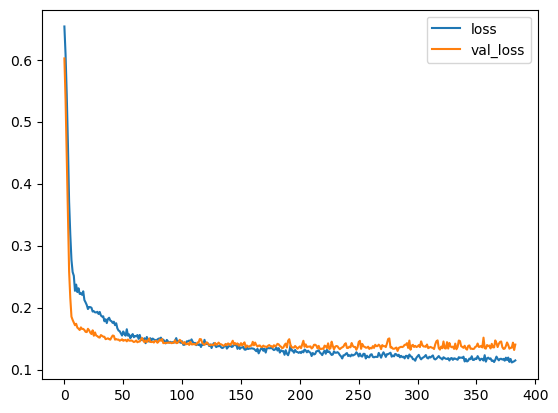

In [1186]:
losses[['loss', 'val_loss']].plot()

<Axes: >

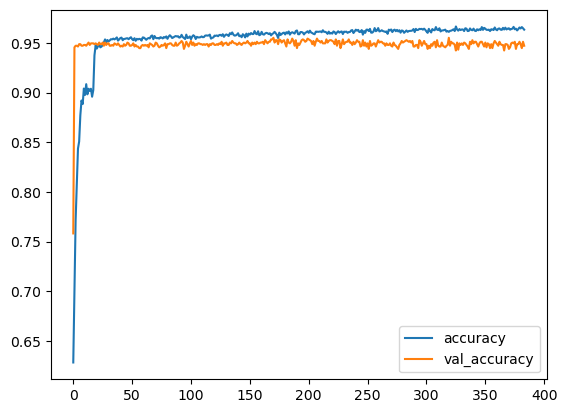

In [1187]:
losses[['accuracy', 'val_accuracy']].plot()

In [1188]:
# Predictions
y_pred_prob = nn_model.predict(X_val)

40/40 [==============================] - 0s 366us/step


In [1189]:
y_pred = np.round(y_pred_prob) # round to 0 or 1 

In [1190]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix

In [1191]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       605
           1       0.96      0.93      0.95       644

    accuracy                           0.95      1249
   macro avg       0.95      0.95      0.95      1249
weighted avg       0.95      0.95      0.95      1249



In [1192]:
confusion_matrix(y_val, y_pred)

array([[583,  22],
       [ 44, 600]])

In [1193]:
# Precision recall curve
from sklearn.metrics import precision_recall_curve

In [1194]:
precision, recall, threshold = precision_recall_curve(y_val, y_pred_prob)

Text(0, 0.5, 'precision')

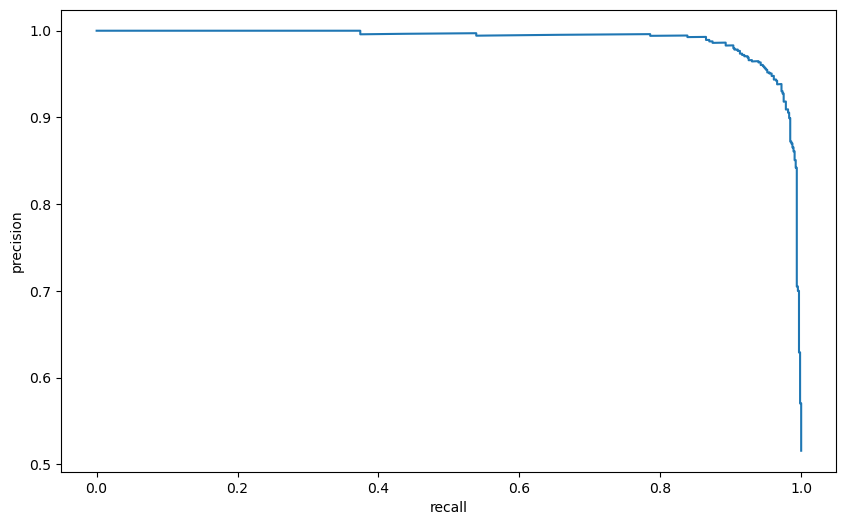

In [1195]:
plt.figure(figsize=(10, 6))
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')

## Evaluating the Model on Test Data

In [1196]:
# prediction
y_pred_prob_test = nn_model.predict(X_test)

49/49 [==============================] - 0s 419us/step


In [1197]:
y_pred_test = np.round(y_pred_prob_test) # round to 0 or 1

In [1198]:
# Evaluation
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       739
           1       0.97      0.95      0.96       822

    accuracy                           0.96      1561
   macro avg       0.96      0.96      0.96      1561
weighted avg       0.96      0.96      0.96      1561



In [1199]:
confusion_matrix(y_test, y_pred_test)

array([[716,  23],
       [ 45, 777]])